In [1]:
import sys
sys.path.append("..")
from MSOModelModule.fancyPlot import basiccolors, cleanAxes
from matplotlib import pyplot as plt
colors = basiccolors()

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Speed and memory test for code variations

This notebook shows the results of several memory and speed tests, including the shell commands that can be used to run these tests. 

**Note**: Do *not* rely on the iPython notebook for the memory tests. Due to the way the Kernel stores variables the memory usage will seem larger than it actually is.  

## Memory test for various batchsizes

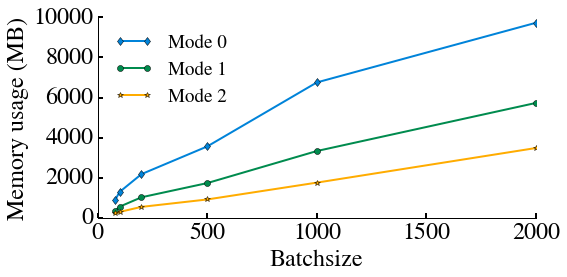

In [2]:
batchsizes = [80, 100, 200, 500, 1000, 2000]
mode_0 = [897.34375, 1294.8828125, 2184.8984375, 3563.3515625, 6751.71484375, 9723.4375]
mode_1 = [356.17578125, 562.07421875, 1032.296875, 1739.27734375, 3335.63671875, 5732.078125]
mode_2 = [225.03125, 302.9375, 554.4921875, 924.00390625, 1762.6328125, 3486.859375]

fig, ax = plt.subplots(1, figsize=(8, 4))
ax.plot(batchsizes, mode_0, color=colors[0], lw=2.0, marker="d", label="Mode 0")
ax.plot(batchsizes, mode_1, color=colors[1], lw=2.0, marker="o", label="Mode 1")
ax.plot(batchsizes, mode_2, color=colors[2], lw=2.0, marker="*", label="Mode 2")
ax.set_xlabel('Batchsize')
ax.set_ylabel('Memory usage (MB)')
ax.legend(loc=2, frameon=False, fontsize=19)
cleanAxes([ax])
plt.tight_layout()
plt.savefig('figures/appendixa/memTestBatch.pdf')
plt.show()

## Memory test for various number of MSO neurons

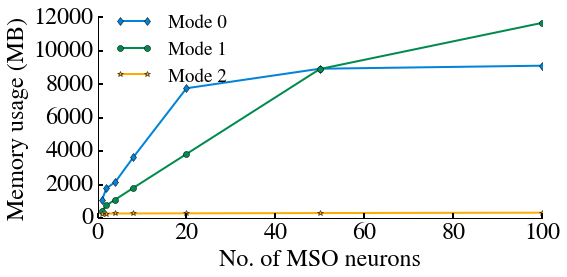

In [3]:
MSO_neurons = [1, 2, 4, 8, 20, 50, 100]
mode_0 = [1093.62109375, 1778.1171875, 2159.1875, 3618.484375, 7754.6484375, 8920.28125, 9102.19140625]
mode_1 = [427.83203125, 764.375, 1103.76171875, 1794.4921875, 3826.40234375, 8901.85546875, 11660.1015625]
mode_2 = [267.234375, 268.49609375, 270.16015625, 272.08203125, 280.8828125, 297.2109375, 319.88671875]

fig, ax = plt.subplots(1, figsize=(8, 4))
ax.plot(MSO_neurons, mode_0, color=colors[0], lw=2.0, marker="d", label="Mode 0")
ax.plot(MSO_neurons, mode_1, color=colors[1], lw=2.0, marker="o", label="Mode 1")
ax.plot(MSO_neurons, mode_2, color=colors[2], lw=2.0, marker="*", label="Mode 2")
ax.set_xlabel('No. of MSO neurons')
ax.set_ylabel('Memory usage (MB)')
ax.legend(loc=2, frameon=False, fontsize=19, bbox_to_anchor=(0.0, 1.1))
cleanAxes([ax])
plt.tight_layout()
plt.savefig('figures/appendixa/memTestMSO.pdf')
plt.show()

## Speed test for various batch sizes

For the speed test all batches will run until they sum up to the same total time

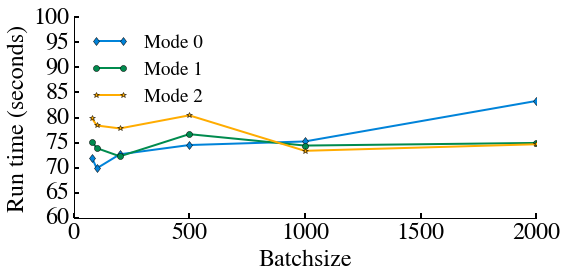

In [4]:
batchsizes = [80, 100, 200, 500, 1000, 2000]

mode_0 = [71.93987489, 69.89002299, 72.69163179, 74.53558207, 75.24955702, 83.31504488]
mode_1 = [75.19978499, 73.92276311, 72.28623915, 76.70299077, 74.43069196, 74.95429921]
mode_2 = [79.85361195, 78.428828, 77.84217286, 80.44880509, 73.38288808, 74.691746  ]

fig, ax = plt.subplots(1, figsize=(8, 4))
ax.plot(batchsizes, mode_0, color=colors[0], lw=2.0, marker="d", label="Mode 0")
ax.plot(batchsizes, mode_1, color=colors[1], lw=2.0, marker="o", label="Mode 1")
ax.plot(batchsizes, mode_2, color=colors[2], lw=2.0, marker="*", label="Mode 2")
ax.set_xlabel('Batchsize')
ax.set_ylabel('Run time (seconds)')
ax.set_ylim([60, 100])
ax.legend(loc=2, frameon=False, fontsize=19)
cleanAxes([ax])
plt.tight_layout()
plt.savefig('figures/appendixa/speedTestBatch.pdf')
plt.show()

## Speed test for various number of MSO neurons

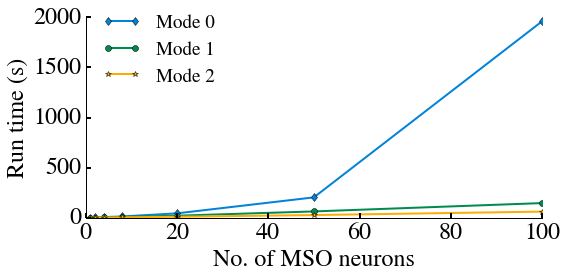

In [5]:
MSO_neurons = [1, 2, 4, 8, 20, 50, 100]
mode_0 = [3.81854606, 5.61840701, 9.07747602, 15.67999887, 46.39822507, 205.58969188, 1959.65922499]
mode_1 = [3.8966341, 4.991256, 6.94584417, 10.64918303, 23.09755397, 65.61181307, 148.74470901]
mode_2 = [3.71844292, 4.19347596, 5.12449598, 6.92156506, 12.58354616, 29.4170742, 63.77098989]

fig, ax = plt.subplots(1, figsize=(8, 4))
ax.plot(MSO_neurons, mode_0, color=colors[0], lw=2.0, marker="d", label="Mode 0")
ax.plot(MSO_neurons, mode_1, color=colors[1], lw=2.0, marker="o", label="Mode 1")
ax.plot(MSO_neurons, mode_2, color=colors[2], lw=2.0, marker="*", label="Mode 2")
ax.set_xlabel('No. of MSO neurons')
ax.set_ylabel('Run time (s)')
ax.legend(loc=2, frameon=False, fontsize=19, bbox_to_anchor=(0.0, 1.1))
cleanAxes([ax])
plt.tight_layout()
plt.savefig('figures/appendixa/speedTestMSO.pdf')
plt.show()


## Speed test for parallelisation 

**Note** The parallel code is not thoroughly test, and some preliminary tests showed unexpected behaviour where sometimes weights of particular batches were not updated. This is possibly caused by the usage of shared memory in the MSO class, which future implementations should avoid. 

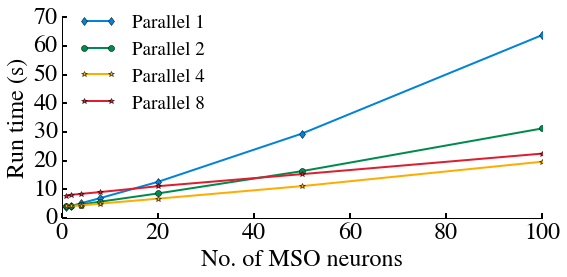

In [6]:
parallel_1 = [3.71844292, 4.19347596, 5.12449598, 6.92156506, 12.58354616, 29.4170742, 63.77098989]
parallel_8 = [7.82792807, 8.08430696, 8.41040111, 9.03768206, 11.0801928, 15.29816985, 22.45261288]
parallel_4 = [4.26323295, 4.30348015, 4.35653496, 5.01869011, 6.74043489, 11.11907196, 19.63360691]
parallel_2 = [4.17172408, 4.16413689, 4.67471313, 5.69143605, 8.55933905, 16.33512807, 31.22348118]

fig, ax = plt.subplots(1, figsize=(8, 4))
ax.plot(MSO_neurons, parallel_1, color=colors[0], lw=2.0, marker="d", label="Parallel 1")
ax.plot(MSO_neurons, parallel_2, color=colors[1], lw=2.0, marker="o", label="Parallel 2")
ax.plot(MSO_neurons, parallel_4, color=colors[2], lw=2.0, marker="*", label="Parallel 4")
ax.plot(MSO_neurons, parallel_8, color=colors[3], lw=2.0, marker="*", label="Parallel 8")
ax.set_xlabel('No. of MSO neurons')
ax.set_ylabel('Run time (s)')
ax.legend(loc=2, frameon=False, fontsize=19, bbox_to_anchor=(0.0, 1.1))
cleanAxes([ax])
plt.tight_layout()
plt.savefig('figures/appendixa/parallelTest.pdf')
plt.show()